# Project: Investigation of factors why people do not show for their medical appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




This project consist in exploring and analysing a dataset containing medical appointments from Sistema Único de Saúde (SUS), brazilian public health system. We are going to explore the reason why patients do not show up for their appointments using the variables below: 

**PatientId**: Identification of a patient;   
**AppointmentID**: Identification of each appointment;  
**Gender:** Male or Female;  
**ScheduledDay**: The day of the actuall appointment, when they have to visit the doctor;  
**AppointmentDay**: The day someone called or registered the appointment;  
**Age**: How old is the patient;  
**Neighbourhood**: Where the appointment takes place;  
**Scholarship**: True or False, indicates if the patient is in the Bolsa Familia program;  
**Hipertension**: True or False;  
**Diabetes**: True or False;  
**Alcoholism**: True or False;  
**Handcap**: Number of disabilities;  
**SMS_received**: 1 or more messages sent to the patient;  
**No-show**: "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up.  

In [29]:
# Importing all the packages I'm using in my project:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

%matplotlib inline 

Analysing the variables, I suppose three factos are the most import ones in order to predict if patients are going to show up: age, receiving a SMS and time. I want to confirm that, so the questions I want to answer are:

1. What is the overall no show rate?
2. Is age an important factor to predict if the patient is showing to its appointment?  
3. Are patients who received a SMS more likely to show for their appointments?
4. How does time affects people showing up for their appointments?
5. Does being in the brazilian's farewell program affect the show up rate?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Loding my data:

In [30]:
df = pd.read_csv("noshow.csv")

Checking for general data duplicates:

In [31]:
df.duplicated().sum()

0

Looking at the dataset structure:

In [32]:
df.shape

(110527, 14)

This dataset has **110527 rows and 14 columns**. Let's see if it has missing values:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Luckly this dataset **has no missing values**, so there's no need to fill up blanks with means or anything like that. Let's take a look at it's data types:

In [34]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

There are some datas types that need to be fixed, like turning **PatientID into integer** and changing **ScheduledDay and AppointmentDay to date type**. I'll do that later when I clean my dataset. Last but not least, let's take a look at some statistics:

In [35]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we have some precious informations about this dataset and we can draw some conclusions: 

1. Is age a important factor to predict if the patient is showing to its appointment?
2. Most people are not included in Brazilian's welfare program Bolsa Família, actually only **9,83% of the dataset is included**;
3. Most people do not suffer from **hipertension (19,72%), diabetes (7,18%) or alcoholism (3,04%)**;  
4. This dataset considers 4 different types of disabilities and only **2,22% carry them**;
5. At least **25% of the pacients received a SMS** remembering them about the appointment.

### Data Cleaning 

When getting to know my dataset, I've realized that some data types need to be fixed before performing my exploratory data analysis. In the next steps, we are going to change **PatientID into integer** and **ScheduledDay and AppointmentDay to date type**.

In [36]:
df.PatientId = df.PatientId.astype(int)

In [37]:
dates_to_transform = [col for col in df.columns if 'Day' in col]
df[dates_to_transform]=df[dates_to_transform].apply(pd.to_datetime)
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

Now that I fixed my data types, I'll fix the -1 age issue. Since I can't have a -1 value as age, I'll simply remove that from my dataset and perform my analisys with the rest 110526 rows. 

In [38]:
df.drop(df.index[df.query('Age == -1').index], inplace = True)

Besides that, in order to make the next codes easier, I'll **change all the columns name into small letters and fix the no-show column**. And, since we are not using the **patient id, the appointment id and the neighbourhood** for any analysis, I'm going to **drop these columns**.

In [39]:
df.columns = df.columns.str.lower()
df.rename(columns={'no-show':'no_show'}, inplace = True)

In [40]:
columns_to_drop = ['appointmentid', 'patientid']
df.drop(columns_to_drop, axis = 1,inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the above head function can see that there are 12 columns left in total. There are **11 independent variables: gender,  scheduledday, appointmentday, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handcap and sms_received. The dependent variable is no_show.**



<a id='eda'></a>
## Exploratory Data Analysis


First of all, I'll create masks for those who went to the appointment and those who missed it, since the encoding of the no-show column can be a little bit confusing. Besides that, I'll check the distribution of all the variables to get to know them better:

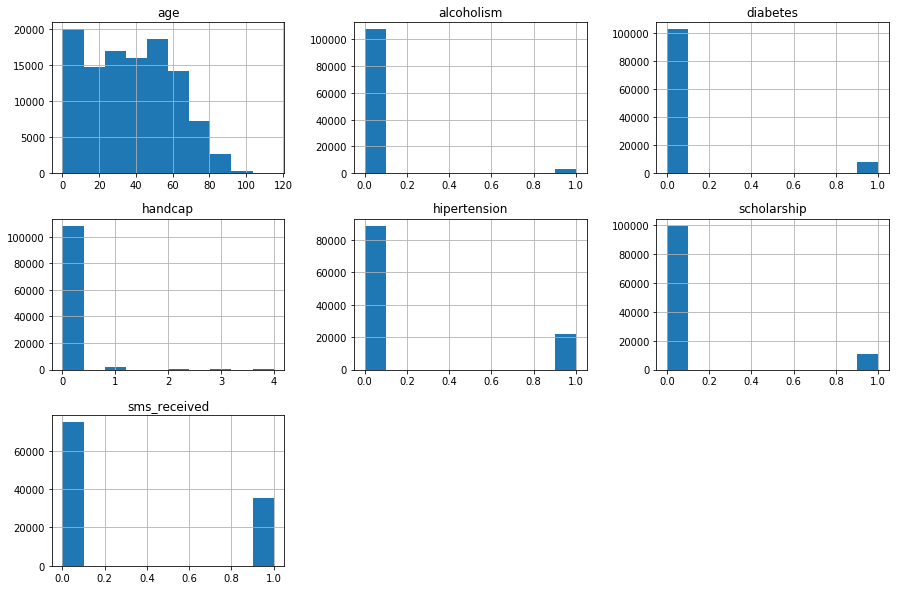

In [41]:
Show = df.no_show == 'No'
No_show = df.no_show == 'Yes'
df.hist(figsize = (15,10));

We can see that the **age distribution is skewed to the right** and most patients **do not suffer from alcoholism, diabetes, handicaps or hipertension**. We can also see that most patients are **not included in Brazilian's welfare program and did not receive a reminder SMS** about the apointment. 

### What is the overall no show rate?

In [103]:
df[No_show].groupby("no_show").size()/df.no_show.value_counts().sum()

no_show
Yes    0.201934
dtype: float64

The overwall **no show rate of this dataset is 20.2%.**

### Is age a important factor to predict if the patient is showing to its appointment?

First of all, let's check the age distribution dividing both groups:

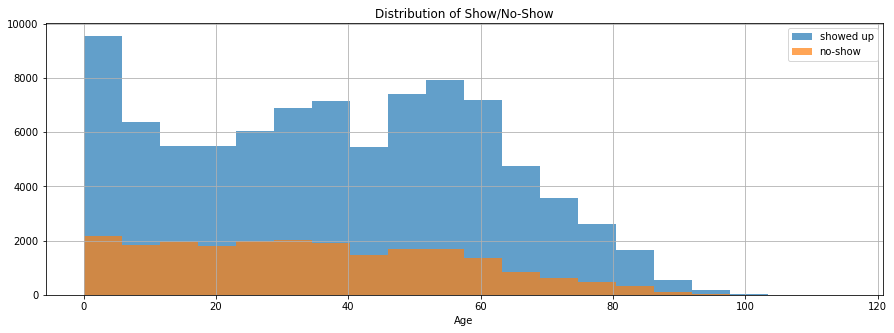

In [42]:
plt.figure(figsize=(15, 5))
df.age[Show].hist(alpha = 0.7, bins = 20, label = 'showed up');
df.age[No_show].hist(alpha = 0.7, bins = 20, label = 'no-show');
plt.legend();
plt.xlabel('Age')
plt.title("Distribution of Show/No-Show");

It looks like as older as people get they have more tendency to show up for their appointment. I'll use pandas crosstable function to see that more clearly:

In [43]:
dataset = pd.crosstab(df.age, df.no_show).reset_index()

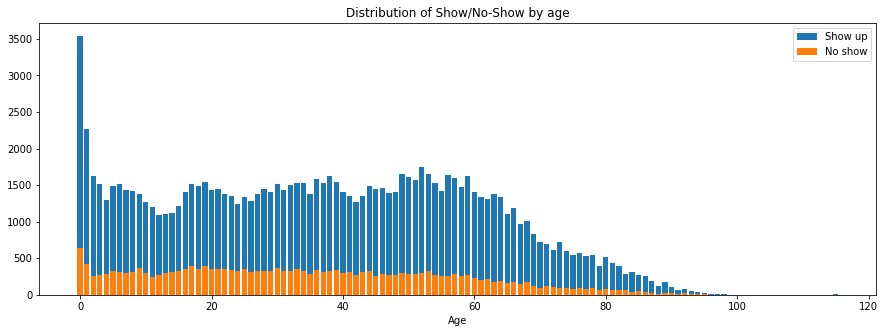

In [44]:
plt.figure(figsize=(15, 5))
plt.bar(dataset["age"].unique(), dataset['No'].values, bottom = dataset['Yes'].values)
plt.bar(dataset["age"].unique(), dataset['Yes'].values)
plt.legend(["Show up", "No show"]);
plt.xlabel('Age')
plt.title("Distribution of Show/No-Show by age");

Besides the fact that appointments with newborns have a high show up rate, **young people have a higher no show rate then older people**. Let's confirm that by calculating the no show rate and plotting it:

In [104]:
dataset["show_up_rate"] = (dataset["Yes"] / (dataset["Yes"] + dataset["No"]))

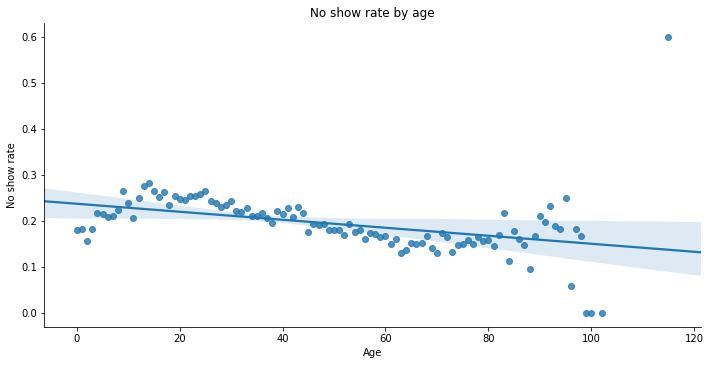

In [106]:
plt.figure(figsize=(15, 5));
sns.lmplot(data=dataset,x="age", y = 'show_up_rate', fit_reg = True, legend = True, aspect=2);
plt.legend();
plt.xlabel('Age');
plt.ylabel('No show rate');
plt.title("No show rate by age");

As we can see from the plot below, the show up rate do goes up as older as the patients are, so age is a key factor.

### Are patients who received a SMS more likely to show for their appointments?

Let's take a look at patients who received an SMS about their appointment:

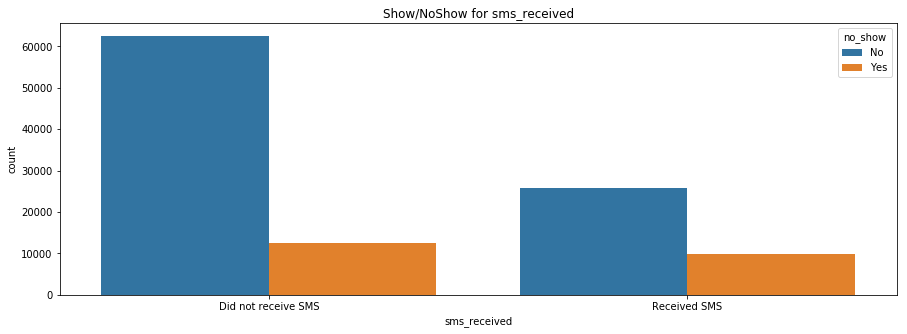

In [47]:
plt.figure(figsize=(15, 5));
graf = sns.countplot(x=df.sms_received, hue=df.no_show)
graf.set_title("Show/NoShow for sms_received")
x_ticks_labels=['Did not receive SMS', 'Received SMS']
graf.set_xticklabels(x_ticks_labels);

Aparrently it looks like the **people who received a SMS about their appointment have a lower show rate than the people who did not receive it**. That is actually counterintuitive because usually people who do receive a reminder SMS have the tendency to show up for their appointments more than those who haven't received it. Again, let's look at the ratio to confirm it:

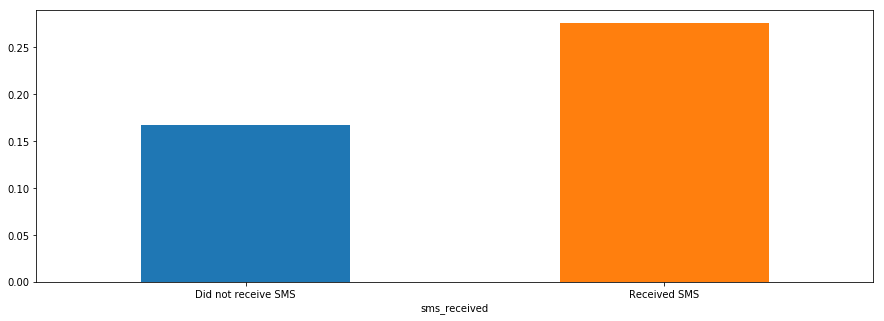

In [82]:
plt.figure(figsize=(15, 5))
df_sms_received = df[No_show].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
graf1 = df_sms_received.plot(kind='bar');
plt.xticks(rotation=(0))
x_ticks_labels=['Did not receive SMS', 'Received SMS']
graf1.set_xticklabels(x_ticks_labels);

As counterintuitive as it is, according to this dataset, people who **received a remind SMS have a 10% higher no show rate than people who did not receive it.** Let's check it discriminating by gender:

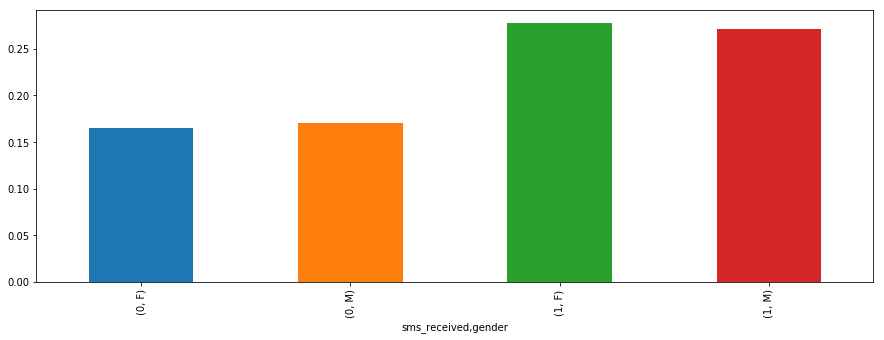

In [49]:
plt.figure(figsize=(15, 5))
df_sms_received = df[No_show].groupby(['sms_received', 'gender']).size()/df.groupby(['sms_received', 'gender']).size()
df_sms_received.plot(kind='bar');

Both genders have basically the same no show rate, that's interesting. Let's take a closer look at gender:

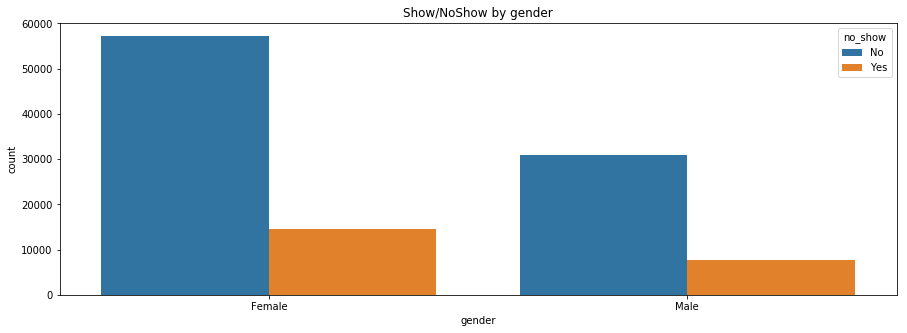

In [50]:
plt.figure(figsize=(15, 5))
graf2 = sns.countplot(x=df.gender, hue=df.no_show)
graf2.set_title("Show/NoShow by gender")
x_ticks_labels=['Female', 'Male']
graf2.set_xticklabels(x_ticks_labels);

Aparrently women book way more appointments than men, but the show ratio is the same.

### How does time affect people showing up for their appointments?

In order to check how time affects people showing up for their appointments we we'll check two main things:
1. The week day the appointment is happening;
2. The waiting time between the scheduled day and the appointment day.

First of all, we we'll create a column with only the day of the appointment:

In [51]:
df['appointmentday_day'] = df['appointmentday'].dt.weekday_name
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_day
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


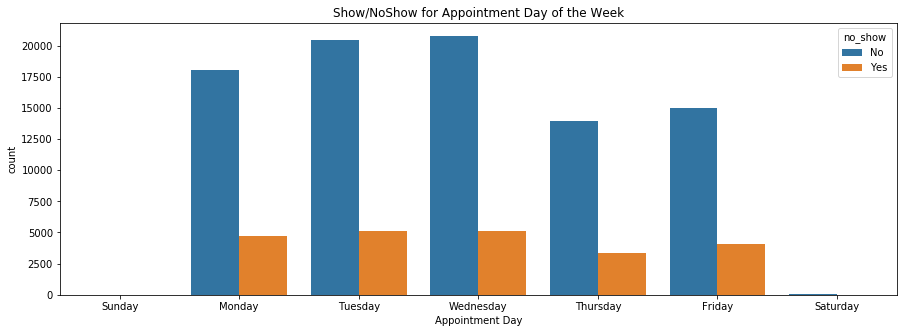

In [52]:
plt.figure(figsize=(15,5))
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
graf3 = sns.countplot(x=df.appointmentday_day, hue=df.no_show, order=week_days)
graf3.set_title("Show/NoShow for Appointment Day of the Week")
plt.xlabel("Appointment Day");

Here we can see that a very few people book appointments on saturdays. Taking a look at the no show up rate for each day: 

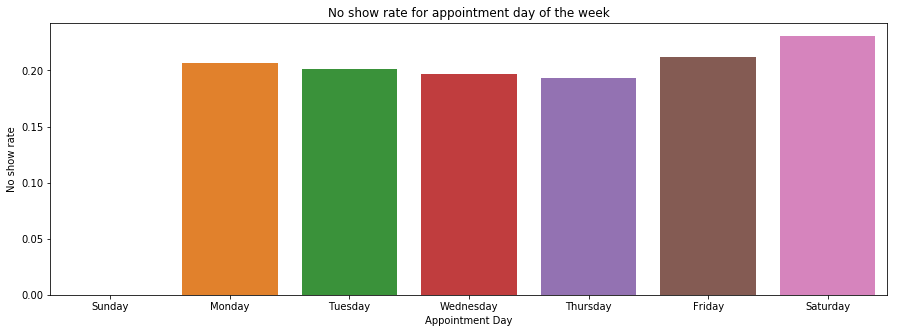

In [53]:
df_week_day_ratio = df[No_show].groupby(['appointmentday_day']).size()/df.groupby(['appointmentday_day']).size()
plt.figure(figsize=(15,5))
graf4 = sns.barplot(x=df_week_day_ratio.index, y=df_week_day_ratio, order=week_days)
graf4.set_title("No show rate for appointment day of the week")
plt.xlabel("Appointment Day");
plt.ylabel("No show rate");

From the chart below, we can see that the day of the week does affect people showing up. Apparently people tend to **show up less for their appointments on Fridays and Saturdays** than the other week days.

In order to check if the waiting time is a key factor for showing up, we we'll have to create a new column from the scheduled and appointment day difference. 

In [54]:
df['waiting_time'] = df['appointmentday'] - df['scheduledday']
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_day,waiting_time
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,-1 days +05:21:52
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,-1 days +07:51:33
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,-1 days +07:40:56
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,-1 days +06:30:29
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,-1 days +07:52:37


We can see that there are negative days in the waiting_time column because the scheduledday column has the specific moment when the appointment was scheduled. In order to avoid that, we need to replace the appointmentday column values for the same values in the scheduled day column if their days difference is less than 0. 

In [55]:
df['appointmentday'] = np.where((df['appointmentday'] - df['scheduledday']).dt.days < 0, df['scheduledday'], df['appointmentday'])
df['waiting_time'] = (df['appointmentday'] - df['scheduledday']).dt.days

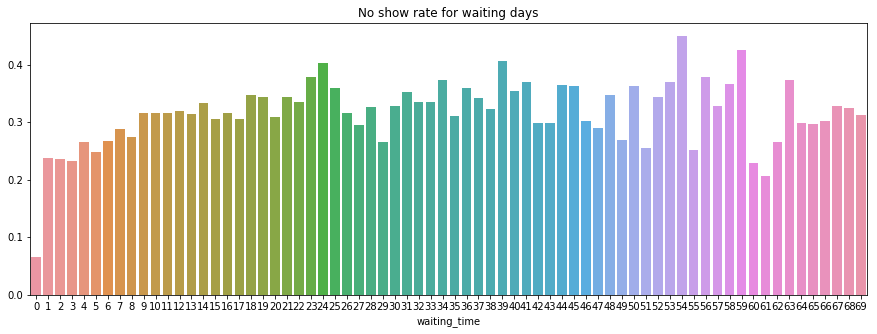

In [62]:
df_wt = df[No_show].groupby(['waiting_time']).size()/df.groupby(['waiting_time']).size()

plt.figure(figsize=(15,5))
graf5 = sns.barplot(x=df_wt.index, y=df_wt, order=df.waiting_time.iloc[:70].index)
graf5.set_title("No show rate for waiting days")
plt.show()

So the **no show rate is less than 10% for those who schedule the appointment for the same day, it increases to about 25% for those who wait 1-9 days and increses again to about 30% for those who wait 10 days more.** 

### Does being in the brazilian's farewell program affect the show up rate?

Aiming to investigate if being in brazilian's welfare program can help us predict if the patient is going to show up, I will plot both groups checking the show up factor:

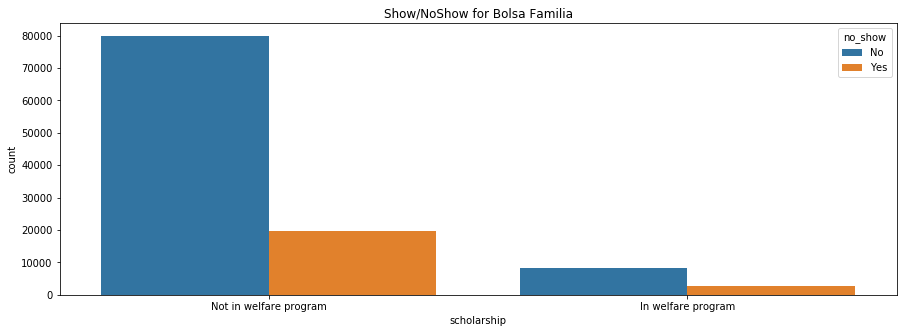

In [59]:
plt.figure(figsize=(15, 5));
graf6 = sns.countplot(x=df.scholarship, hue=df.no_show)
graf6.set_title("Show/NoShow for Bolsa Familia")
x_ticks_labels=['Not in welfare program', 'In welfare program']
graf6.set_xticklabels(x_ticks_labels);

It looks like those patients who are in the welfare program have a lower no show rate then those who are not. Le'ts confirm that by checking the no show rate for both groups:

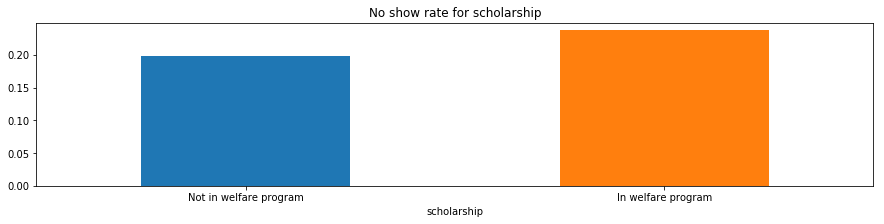

In [81]:
plt.figure(figsize=(15, 3))
df_sms_received = df[No_show].groupby(['scholarship']).size()/df.groupby(['scholarship']).size()
graf6 = df_sms_received.plot(kind='bar');
x_ticks_labels=['Not in welfare program', 'In welfare program']
plt.xticks(rotation=(0))
graf6.set_title("No show rate for scholarship")
graf6.set_xticklabels(x_ticks_labels);

Unlike we expected, patients who are **in the welfare program do not have greater responsability with showing up to their appointments, with an almost 5% higher no show rate**. We expect that at least those who suffer from hipertension or any other deseases have a lower no show rate aswell, le'ts check that out:

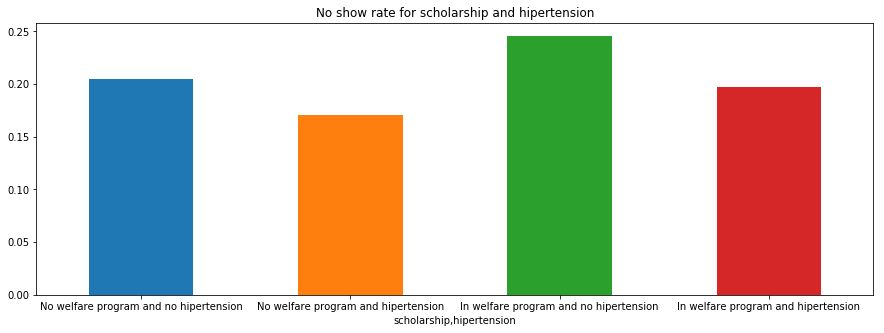

In [83]:
plt.figure(figsize=(15, 5))
df_sms_received = df[No_show].groupby(['scholarship', 'hipertension']).size()/df.groupby(['scholarship', 'hipertension']).size()
graf7 = df_sms_received.plot(kind='bar');
plt.xticks(rotation=(0))
graf7.set_title("No show rate for scholarship and hipertension")
x_ticks_labels=['No welfare program and no hipertension', 'No welfare program and hipertension', 'In welfare program and no hipertension', 'In welfare program and hipertension']
graf7.set_xticklabels(x_ticks_labels);

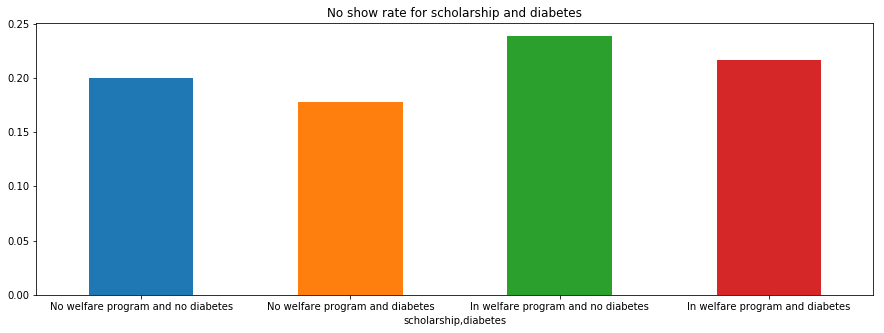

In [85]:
plt.figure(figsize=(15, 5))
df_sms_received = df[No_show].groupby(['scholarship', 'diabetes']).size()/df.groupby(['scholarship', 'diabetes']).size()
graf8 = df_sms_received.plot(kind='bar');
plt.xticks(rotation=(0))
graf8.set_title("No show rate for scholarship and diabetes")
x_ticks_labels=['No welfare program and no diabetes', 'No welfare program and diabetes', 'In welfare program and no diabetes', 'In welfare program and diabetes']
graf8.set_xticklabels(x_ticks_labels);

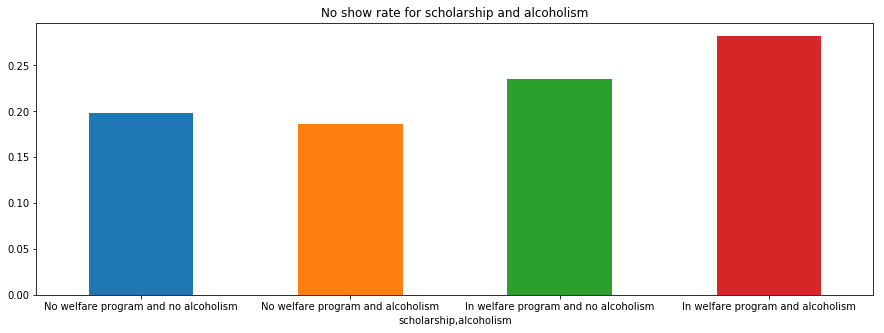

In [87]:
plt.figure(figsize=(15, 5))
df_sms_received = df[No_show].groupby(['scholarship', 'alcoholism']).size()/df.groupby(['scholarship', 'alcoholism']).size()
graf9 = df_sms_received.plot(kind='bar');
plt.xticks(rotation=(0))
graf9.set_title("No show rate for scholarship and alcoholism")
x_ticks_labels=['No welfare program and no alcoholism', 'No welfare program and alcoholism', 'In welfare program and no alcoholism', 'In welfare program and alcoholism']
graf9.set_xticklabels(x_ticks_labels);

As we thought, the **no show rate decreases for almost all the groups with diseases, unless for those who are in the welfare program and suffer from alcoholism.** 

<a id='conclusions'></a>
## Conclusions

This project was about performing an analysis of a medical appointments database looking for factors that might help us predict if the patient was going to show up to its appointment or not.

This dataset has 110527 rows and 14 columns, no duplicated values and no missing values. 

Here are some findings:

> 1. The **overwall no show rate** of this dataset is **20.2%**.  
> 2. Age is a key factor to predict if the patient is going to show up. The **no show rate tends to be lower the older the patient is**.  
> 3. Patients who **received a remind SMS have a 10% higher no show rate** than people who did not receive it, as counterintuitive as it is. In this case, gender does not matter, since both groups have almost the same no show rate.
> 4. Patients tend to **show up less for their appointments on Fridays and Saturdays** than the other week days, especially **Saturdays with an about 5% higher no show rate**.
>5. The **no show rate tends to go up as patients waiting time till the appointment goes up**. The no show rate is less than 10% for those who schedule the appointment for the same day, it increases to about 25% for those who wait 1-9 days and increses again to about 30% for those who wait 10 days more.
>6. Patients who are in the **welfare program** do not have greater responsability with showing up to their appointments, with an almost **5% higher no show rate**
>7. Having a disease affects if people are going to show up, as the **no show rate decreases for almost all the groups with diseases, unless for those who are in the welfare program and suffer from alcoholism.**

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])